Nama : Gabriella Widjaja

NIM : 2702382083

Link Video : https://drive.google.com/drive/folders/1w4sCwuCOZIIIGZn7sFvNZM3aTB8HnLdh?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/UAS_DL/B_23'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Hitung jumlah gambar di dalam folder
n = len(os.listdir(file_path))
print(f"Folder tersebut berisi {n} gambar")


Folder tersebut berisi 1074 gambar


In [ ]:
from collections import Counter # untuk menghitung frekuensi elemen
image_files = [f for f in os.listdir(file_path)] # membaca semua nama file dalam folder
exts = [os.path.splitext(f)[-1].lower() for f in image_files] # ambil ekstensi dari masing" file lalu diubah jd huruf kecil (biar konsisten)
ext_counts = Counter(exts) # menghitung berapa kali tiap jenis ekstensi muncul
print("Format file yang ditemukan:")
print(ext_counts)

Format file yang ditemukan:
Counter({'.jpg': 1074})


In [ ]:
from PIL import Image # untuk membuka file gambar
import os # untuk akses file dan folder

#mengecek apakah ada gambar yang corrupt/rusak di dalam file

corrupt = [] # list kosong, untuk menyimpan nama-nama file yang corrupt
for f in image_files:
    try:
        img_path = os.path.join(file_path, f) #menggabungkan nama folder + nama file, biar jadi path lengkap
        with Image.open(img_path) as img:
            img.load()  #membaca isi gambar
    except:
        corrupt.append(f) # klo gambar gagal dibuka, namanya akan masuk ke list file corrupt

print(f"Ada {len(corrupt)} gambar corrupt")


Ada 0 gambar corrupt


In [ ]:
from PIL import Image
import os
from collections import Counter # untuk hitung berapa kali ukuran tertentu muncul
# mengecek ukuran gambar di folder
sizes = [] # list kosong untuk simpan ukuran gambar width x height

for f in image_files:
    img_path = os.path.join(file_path, f)
    with Image.open(img_path) as img: #buka gambar dan ambil ukurannya
        sizes.append(img.size)  # dikembalikan dalam bentuk tuple (width, height) lalu disimpan ke dalam list

# hitung ukuran yang paling sering muncul
size_counts = Counter(sizes)
print("ukuran gambar paling sering:")
for size, count in size_counts.most_common(10): # menampilkan 10 ukuran yang paling sering muncul
    print(f"Ukuran {size}: {count} gambar")


ukuran gambar paling sering:
Ukuran (600, 600): 1074 gambar


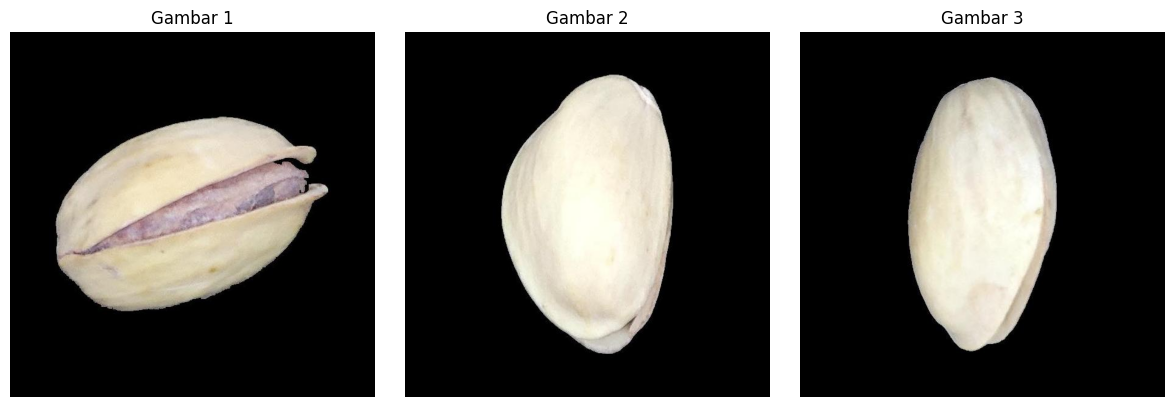

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# melihat contoh isi gambarnya

# ambil semua file gambar
image_files = [f for f in os.listdir(file_path)]

# tampilkan 3 gambar pertama
plt.figure(figsize=(12, 4))

for i in range(3):
    img_path = os.path.join(file_path, image_files[i])
    img = mpimg.imread(img_path) # baca gambar jadi array numpy biar bisa dibaca

    plt.subplot(1, 3, i+1)
    plt.imshow(img) # menampilkan gambar
    plt.axis('off')
    plt.title(f"Gambar {i+1}")

plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter
# mengecek jenis/format warna gambar
modes = [] # list kosong untuk simpan jenis warna yang muncul

for f in image_files:
    img_path = os.path.join(file_path, f)
    try:
        with Image.open(img_path) as img:
            modes.append(img.mode) # tipe representasi warna gambar yang dibaca oleh PIL.Image
    except:
        modes.append('error')

mode_counts = Counter(modes)
print(mode_counts)


Counter({'RGB': 1074})


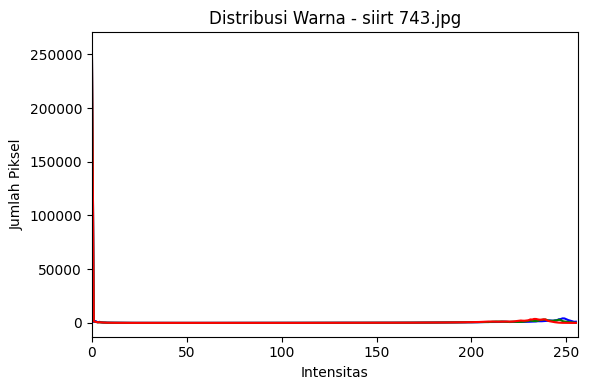

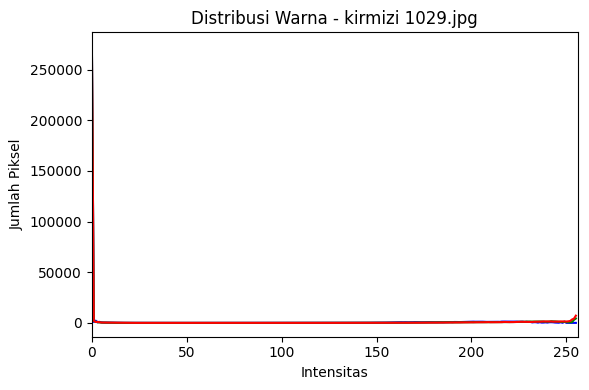

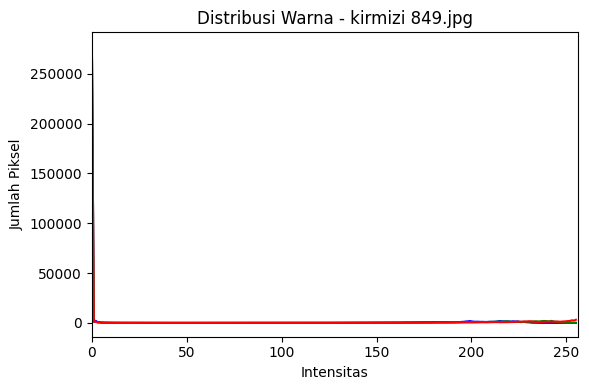

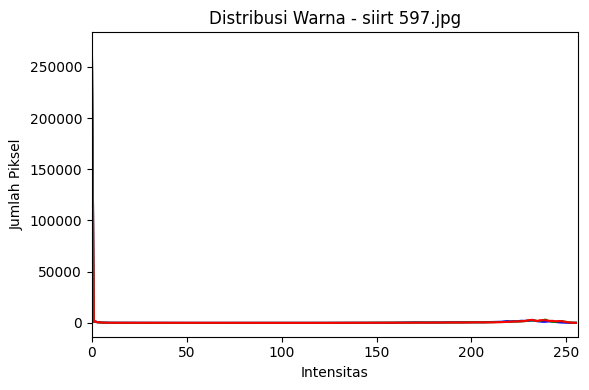

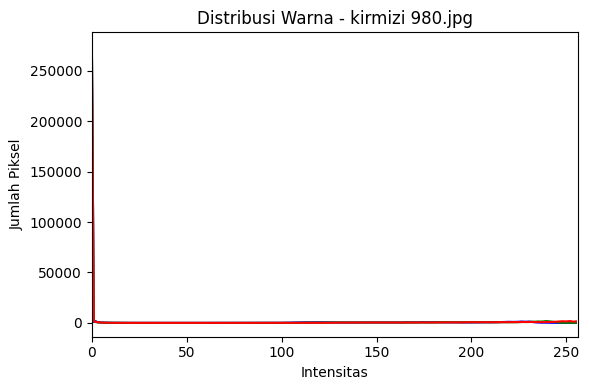

In [ ]:
import os
import cv2 # dari OpenCV untuk baca gambar dan hitung histogram warna
import random # mengambil 5 gambar acak dari folder
import matplotlib.pyplot as plt # untuk menampilkan histogram

# Ambil 5 gambar acak dari folder
sample_files = random.sample(image_files, 5)

# Loop setiap gambar acak dan tampilkan histogram RGB-nya
for idx, f in enumerate(sample_files):
    img_path = os.path.join(file_path, f) # menyatukan folder (file_path) dan nama file (f) menjadi path lengkap
    img = cv2.imread(img_path) # membaca gambar tersebut dalam format BGR (biru,hijau,merah)

    # Ukur histogram per channel (BGR)
    colors = ('b', 'g', 'r')
    plt.figure(figsize=(6, 4))
    for i, col in enumerate(colors): # menghasilkan pasangan index dan warna: (0, 'b'), (1, 'g'), (2, 'r')
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])

    plt.title(f"Distribusi Warna - {f}")
    plt.xlabel("Intensitas") # sumbu x ->  Intensitas warna dari 0 (gelap) ke 255 (terang).
    plt.ylabel("Jumlah Piksel") # jumlah piksel yang memiliki intensitas tertentu
    plt.tight_layout()
    plt.show()


Berdasarkan histogram distribusi warna pada kelima gambar
- gambar tersebut memiliki banyak piksel dengan warna sangat gelap atau bahkan hitam, terlihat dari lonjakan tinggi pada intensitas warna 0.

-  warna merah tampak jauh lebih dominan dibanding hijau dan biru

-  Di sisi lain, jumlah piksel dengan warna terang cukup sedikit, yang mengindikasikan bahwa kelima gambar secara umum cenderung gelap, kemungkinan karena latar belakang berwarna hitam.


In [ ]:
from sklearn.model_selection import train_test_split

# split jadi 80% train dan 20% temp
# random state : biar setiap kali split data, pembagiannya selalu sama
train_files, temp_files = train_test_split(image_files, test_size=0.2, random_state=42)

# lalu split temp jadi 10% val dan 10% test
val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

print(f"Train: {len(train_files)}")
print(f"Validation: {len(val_files)}")
print(f"Test: {len(test_files)}")


Train: 859
Validation: 107
Test: 108


In [ ]:
# buat folder di drive untuk simpan hasil gambar yang di resize
base_dir = '/content/drive/MyDrive/UAS_DL/resized_data'
os.makedirs(os.path.join(base_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'test'), exist_ok=True)

In [ ]:
def save_resized_images(file_list, save_dir): # menerima daftar nama file yg mau diproses & folder tujuan hasil resize disimpan
    os.makedirs(save_dir, exist_ok=True) # buat folder tujuannya, klo udh ada di set true biar tidak error
    for f in file_list: # loop setiap file dalam daftar
        img_path = os.path.join(file_path, f) # buat path lengkap untuk gambar asli
        save_path = os.path.join(save_dir, f) # path lengkap untuk hasil resize
        try:
            with Image.open(img_path) as img:
                img = img.convert("RGB") # konversi gambar ke RGB
                img = img.resize((100, 100)) # ubah ukuran jadi 100 x 100 pixel
                img.save(save_path) # simpan hasilnya ke folder
        except Exception as e:
            print(f"Error memproses {f}: {e}")

# simpan semua hasil resize ke masing-masing folder
save_resized_images(train_files, os.path.join(base_dir, 'train'))
save_resized_images(val_files, os.path.join(base_dir, 'val'))
save_resized_images(test_files, os.path.join(base_dir, 'test'))


In [ ]:
import os
import numpy as np
from PIL import Image

def load_images(folder): # memuat gambar dari folder
    images = [] # untuk menampun gambar yang sudah diproses
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(folder, filename)
            img = Image.open(path).convert('RGB')
            img = np.array(img) / 255.0  # ubah gambar jd array numpy -> normalize to [0,1]
            images.append(img) # masukin gambar yang udh diproses ke list
    return np.array(images)

clean_images = load_images('/content/drive/MyDrive/UAS_DL/resized_data/train/')
print("Jumlah gambar bersih:", clean_images.shape)


Jumlah gambar bersih: (859, 100, 100, 3)


 ada 859 gambar berwarna, masing-masing berukuran 100×100 piksel, dan sudah dalam bentuk array NumPy ter-normalisasi (nilai piksel antara 0 dan 1)

In [ ]:
# menambahkan noise ke gambar -> untuk melatih model agar tahan dengan gangguan
noise_mean = 0.0 # rata-rata , nilai pusat di 0.0
noise_std = 0.1 # sebaran noise , variasinya 0.1

noisy_images = [] # untuk simpan gambar yang sudah ditambah noise
np.random.seed(42)

for img in clean_images:
    noise = np.random.normal(noise_mean, noise_std, img.shape) # buat noise acak dengan ukuran yang sama seperti gambar
    noisy_img = img + noise # tambahkan noise ke gambar aslinya
    noisy_img = np.clip(noisy_img, 0, 1)  # clamp semua nilai pixel biar tetap di range 0-1
    noisy_images.append(noisy_img)

noisy_images = np.array(noisy_images) # ubah list jd array numpy
print("Jumlah gambar noisy:", noisy_images.shape)


Jumlah gambar noisy: (859, 100, 100, 3)


In [ ]:
from sklearn.model_selection import train_test_split

# membagi data gambar noisy (input), gambar bersih (target) ke data training & validation
x_train, x_val, y_train, y_val = train_test_split(
    noisy_images, clean_images, test_size=0.1, random_state=42
)

In [ ]:
from tensorflow.keras import layers, models

# Input layer
input_img = layers.Input(shape=(100, 100, 3)) # gambar ukuran 100x100 pixel, 3 channel warna (RGB

# Encoder : compress gambar jadi representasi kecil
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)   # mengambil fitur visual dari gambar # (100, 100, 32)
x = layers.MaxPooling2D((2, 2), padding='same')(x)                             # (50, 50, 32)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)           # (50, 50, 64)
x = layers.MaxPooling2D((2, 2), padding='same')(x)                             # (25, 25, 64)

# Bottleneck
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)           # (25, 25, 64)

# Decoder
x = layers.UpSampling2D((2, 2))(x)                                             # (50, 50, 64)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)           # (50, 50, 32)
x = layers.UpSampling2D((2, 2))(x)                                             # (100, 100, 32)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)   # (100, 100, 3)

# Build the model
autoencoder = models.Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Lihat ringkasan
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 100, 100, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)


x_train: (773, 100, 100, 3)
y_train: (773, 100, 100, 3)
x_val: (86, 100, 100, 3)
y_val: (86, 100, 100, 3)


In [ ]:
for name, data in [('x_train', x_train), ('y_train', y_train), ('x_val', x_val), ('y_val', y_val)]:
    print(f"{name}: dtype={data.dtype}, range=({data.min():.3f}, {data.max():.3f})")


x_train: dtype=float64, range=(0.000, 1.000)
y_train: dtype=float64, range=(0.000, 1.000)
x_val: dtype=float64, range=(0.000, 1.000)
y_val: dtype=float64, range=(0.000, 1.000)


In [ ]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_val = x_val.astype('float32')
y_val = y_val.astype('float32')


In [ ]:
print(x_train.dtype)  # Harusnya: float32


float32


In [ ]:
# melatih model

history = autoencoder.fit(
    x_train, y_train,
    epochs=30, # ulangi proses training sebanyak 30x
    batch_size=32, # memproses 25 batch per epoch, sesuai jumlah data dibagi batch size -> 800/32
    validation_data=(x_val, y_val) # gambar noisy & bersih -> cek performa model di luar data training
)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - loss: 0.1322 - val_loss: 0.0050
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0041 - val_loss: 0.0036
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0020 - val_loss: 0.0032
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0

Untuk epoch 1, error masih cukup tinggi karena model masih belajar

Untuk 2-10 loss dan val_loss turun cukup signifikan, artinya model belajar dengan cepat dan prediksinya semakin mendekati nilai asli

Di epoch 11-20 mulai konvergen dimana nilai loss dan val_loss cukup stabil berkisar di 0.0011

Lalu untuk epoch setelahnya nilai loss dan val_loss makin mengecil yang artinya kesalahan model saat proses data training dan saat diuji pada data validasi semakin kecil -> prediksinya meningkat dimana hasil akhirnya 0.008 - 0.009 , jadi model berhasil menghasilkan gambar yang sangat mirip dengan data aslinya, bisa membedakan noise dan rekonstruksi gambar dengan akurat

-> tidak ada overfitting karena val_lossnya terus turun tidak tiba-tiba melonjak naik

In [ ]:
#autoencoder.save('/content/drive/MyDrive/UAS_DL/my_autoencoder_model.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


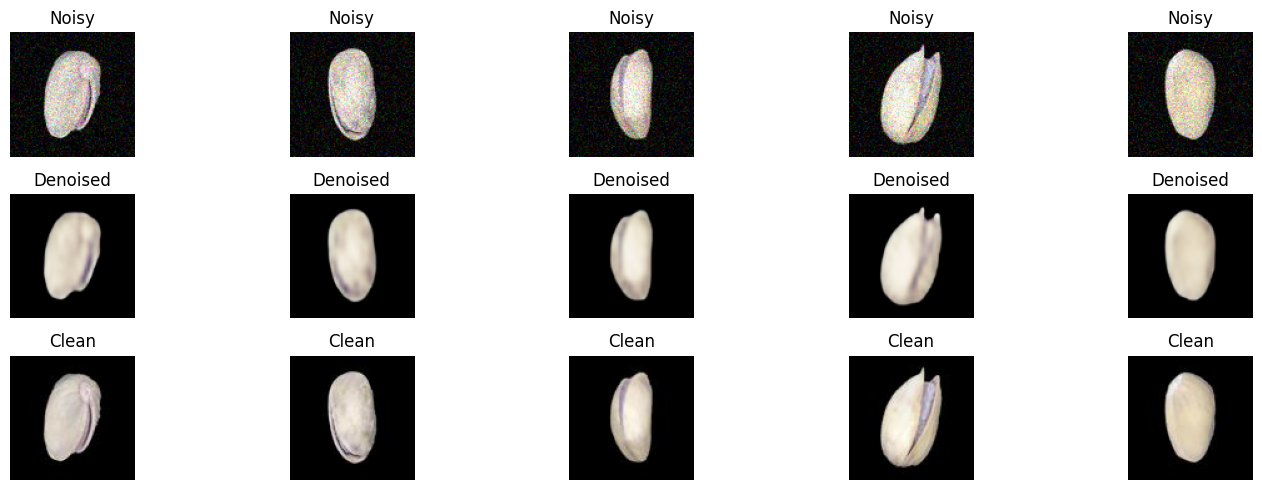

In [ ]:
import matplotlib.pyplot as plt

# Pilih 5 contoh dari data validasi
n = 5
plt.figure(figsize=(15, 5))
for i in range(n):
    # Gambar noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_val[i])
    plt.title("Noisy")
    plt.axis("off")

    # Gambar hasil denoise
    denoised_img = autoencoder.predict(np.expand_dims(x_val[i], axis=0))[0]
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_img)
    plt.title("Denoised")
    plt.axis("off")

    # Gambar asli (ground truth)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(y_val[i])
    plt.title("Clean") # gambar yang jadi acuan saat model dilatih
    plt.axis("off")
plt.tight_layout()
plt.show()


Hasil autoencoder untuk image denoising
- baris 1 adalah gamabr yang telah diberikan noise ( ada bintik-bintik )
- denoised adalah hasil prediksi dari model autoencoder -> model mencoba menebak bentuk asli dari gambar yang noisy dan disini hasilnya terlihat bentuk nya masih tertangkap, terlihat lebih halus dan bintik-bintiknya tidak ada, tapi sedikit blur

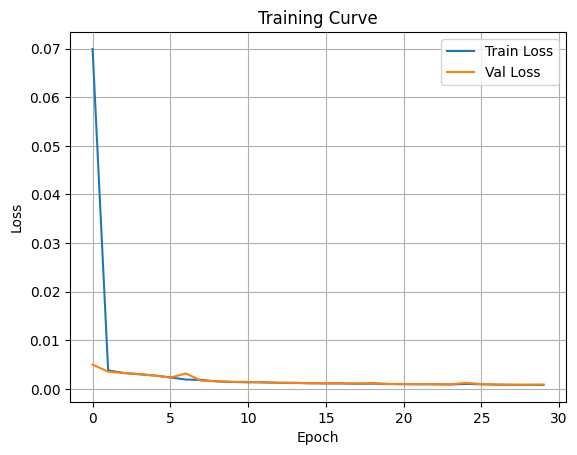

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Curve")
plt.legend()
plt.grid(True)
plt.show()


grafik training curve menunjukkan bahwa model autoencoder berhasil belajar dengan sangat baik

-  awalnya, loss cukup tinggi tapi langsung turun tajam dalam beberapa epoch pertama, lalu terus menurun secara stabil sampai akhir

- baik train loss maupun validation loss sama-sama turun dan saling mengikuti dengan rapat -> model tidak hanya bagus di data latih, tapi juga bekerja baik di data yang belum pernah dilihat sebelumnya (data validasi)

- idak terlihat tanda-tanda overfitting (val loss tetap turun) , dan performa model stabil di sekitar pertengahan training

overall model dapat belajar dengan efektif dan tidak overfitting



In [ ]:
input_img = layers.Input(shape=(100, 100, 3))

# Encoder dengan residual connections -> meningkatkan kemampuan autoencoder dengan menambahkan shortcut antar layer
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
residual_1 = x
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.Add()([x, residual_1])  # Skip connection
x = layers.MaxPooling2D((2, 2), padding='same')(x)                             # (50, 50, 32)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
residual_2 = x
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.Add()([x, residual_2])  # Skip connection
x = layers.MaxPooling2D((2, 2), padding='same')(x)                             # (25, 25, 64)

# Bottleneck
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)           # (25, 25, 128)

# Decoder dengan residual connections
x = layers.UpSampling2D((2, 2))(x)                                             # (50, 50, 128)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)           # (50, 50, 64)
residual_3 = x
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.Add()([x, residual_3])  # Skip connection

x = layers.UpSampling2D((2, 2))(x)                                             # (100, 100, 64)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)           # (100, 100, 32)
residual_4 = x
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.Add()([x, residual_4])  # Skip connection

decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)    # (100, 100, 3)

model = models.Model(input_img, decoded)
model.compile(optimizer='adam', loss='mse', metrics=['mae']) # mae (mean absolute error) → tambahan metrik buat lihat kesalahan rata-rata per pixel



In [ ]:
model_enc = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(x_val, y_val)
)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 353ms/step - loss: 0.1026 - mae: 0.2444 - val_loss: 0.0040 - val_mae: 0.0239
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.0036 - mae: 0.0228 - val_loss: 0.0034 - val_mae: 0.0215
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0031 - mae: 0.0208 - val_loss: 0.0032 - val_mae: 0.0215
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0029 - mae: 0.0206 - val_loss: 0.0030 - val_mae: 0.0200
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0026 - mae: 0.0191 - val_loss: 0.0024 - val_mae: 0.0191
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0023 - mae: 0.0186 - val_loss: 0.0019 - val_mae: 0.0170
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0019 - mae: 0.0169 - val_loss: 0.0025 - val_mae: 0.0189
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0021 - mae: 0.0178 - val_loss: 0.0021 - val_mae: 0.0180
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0

- di awal epoch loss masi besar karena model masih belajar, lalu setelahnya nilai loss dan val_loss turun drastis yang artinya model mulai memahami cara membersihkan gambar dari noise, di epoch-epoch berikutnya nilai loss dan val_loss semakin kecil dan stabil
- nilai mae juga semakin kecil artinya prediksi pixel model semakin mirip dengan gambar asli
- model tidak overfitting karena nilai error di data validasi juga ikut menurun, artinya model tidak hanya bagus di data latih, tapi juga bisa bekerja dengan baik di data yang belum pernah dilihat sebelumnya

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step


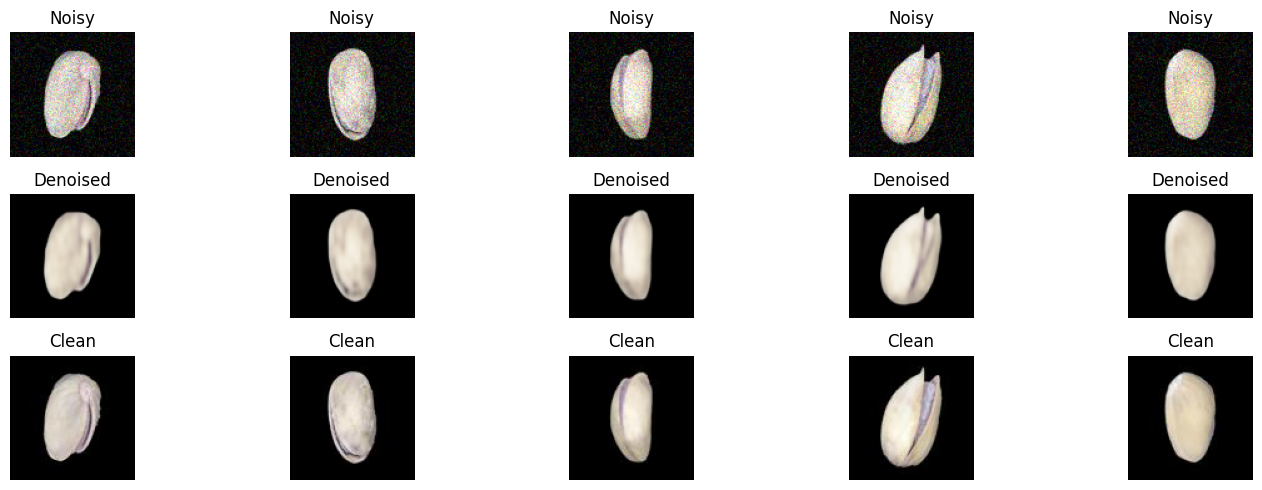

In [ ]:
import matplotlib.pyplot as plt

n = 5
decoded_imgs = model.predict(x_val[:n])

plt.figure(figsize=(15, 5))
for i in range(n):
    # Noisy input
    plt.subplot(3, n, i + 1)
    plt.imshow(x_val[i])
    plt.title("Noisy")
    plt.axis("off")

    # Denoised
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised")
    plt.axis("off")

    # Ground truth
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(y_val[i])
    plt.title("Clean")
    plt.axis("off")
plt.tight_layout()
plt.show()


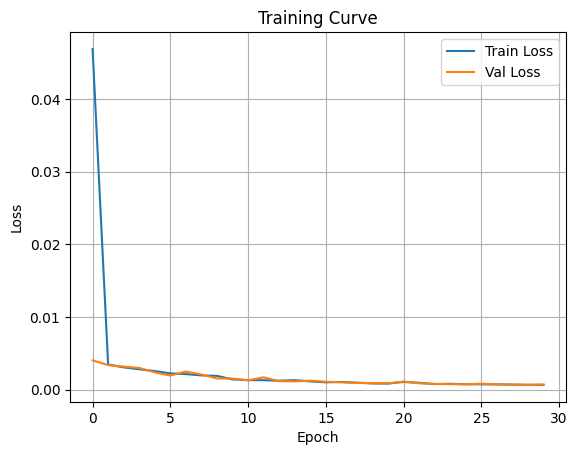

In [ ]:
plt.plot(model_enc.history['loss'], label='Train Loss')
plt.plot(model_enc.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Curve")
plt.legend()
plt.grid(True)
plt.show()

grafik training curve menunjukkan bahwa model autoencoder berhasil belajar dengan sangat baik

-  awalnya, loss cukup tinggi tapi langsung turun tajam dalam beberapa epoch pertama, lalu terus menurun secara stabil sampai akhir

- baik train loss maupun validation loss sama-sama turun dan saling mengikuti dengan rapat -> model tidak hanya bagus di data latih, tapi juga bekerja baik di data yang belum pernah dilihat sebelumnya (data validasi)

- tidak terlihat tanda-tanda overfitting (val loss tetap turun) , dan performa model stabil di sekitar pertengahan training

overall model dapat belajar dengan efektif dan tidak overfitting

In [ ]:
from skimage.metrics import structural_similarity as ssim # untuk menghitung structural similarity.
from skimage.color import rgb2gray # karena SSIM biasanya dihitung di grayscale
import numpy as np # untuk array dan perhitungan rata-rata
# SSIM (Structural Similarity Index) mengukur seberapa mirip gambar hasil prediksi model dengan gambar asli
# nilai berkisar 0-1 -> semakin mendekati 1 berarti semakin mirip

# Base model

# Prediksi gambar denoised dari data validasi
decoded_imgs = autoencoder.predict(x_val)

# Hitung SSIM satu per satu
ssim_scores = [] # simpan skor ssim setiap gambar
for i in range(len(decoded_imgs)): # looping semua gambar hasil prediksi
    clean = rgb2gray(y_val[i])        # gambar asli
    denoised = rgb2gray(decoded_imgs[i])  # hasil model diubah ke grayscale supaya bisa dibandingkan ssim
    score = ssim(clean, denoised, data_range=1.0)  # karena gambar dinormalisasi 0–1
    ssim_scores.append(score)

# Hitung rata-ratanya
print("Rata-rata SSIM:", np.mean(ssim_scores))


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
Rata-rata SSIM: 0.9388563093593745


In [ ]:
from skimage.metrics import structural_similarity as ssim
from skimage.color import rgb2gray
import numpy as np

# model modifikasi

# Prediksi gambar denoised dari data validasi
decoded_imgs = model.predict(x_val)

# Hitung SSIM satu per satu
ssim_scores = []
for i in range(len(decoded_imgs)):
    clean = rgb2gray(y_val[i])        # gambar asli
    denoised = rgb2gray(decoded_imgs[i])  # hasil model
    score = ssim(clean, denoised, data_range=1.0)  # karena gambar dinormalisasi 0–1
    ssim_scores.append(score)

# Hitung rata-ratanya
print("Rata-rata SSIM:", np.mean(ssim_scores))



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step
Rata-rata SSIM: 0.9453175225342991


Model ke-2 menunjukkan performa yang lebih baik dibandingkan Model ke-1, ditunjukkan oleh nilai rata-rata SSIM yang lebih tinggi, yaitu 0.9453 dibandingkan 0.9389. Artinya hasil rekonstruksi gambar dari Model ke-2 memiliki kemiripan struktural yang lebih tinggi terhadap gambar asli,  meskipun selisih nilainya relatif kecil (sekitar 0.0064)